In [1]:
#importing libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Initial Analysis

In [2]:
#importing datasets to be used
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#first look at data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Some observations:
1. Data is split into 39 numerical and 42 objects categories.
2. Certain features like Fence, Pool QC, Alley, Misc Feature, Fireplace Qu have a lot of missing data (>=~50%). Indicating that these are either not important or the features may not exist.

In [4]:
#first look at data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [5]:
#remove spaces and change to lowercase for easier handling
train.columns = train.columns.str.lower().str.replace(" ","")
test.columns = test.columns.str.lower().str.replace(" ","")

In [6]:
#check columns 
train.head(1)

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [7]:
#check columns
test.head(1)

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [8]:
#first look at data stats
train.describe()

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
#first look at data stats
test.describe()

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


Some preliminary observations: 
1. garageyrbuilt has an impossible value of 2207, this anomaly needs to be further looked into.
2. some columns like lotarea and masvnrare have max values much higher than the 75 percentile, indicating some anomaly that will need a 2nd look at.

In [10]:
#a closer look at the garageyrbuilt anomaly
train[train['garageyrblt']>2010].sort_values(by='saleprice',ascending =False)[['garageyrblt','yearbuilt','yrsold','yearremod/add']]

,garageyrblt,yearbuilt,yrsold,yearremod/add
1699,2207.0,2006,2007,2007


Since the yearremod/add value of 2007 looks similar to 2207, garageyrblt for this entry would be replace to be 2007 later.

In [11]:
#to take a closer look at lot area
train.sort_values(by="lotarea", ascending=False).head(10)

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,302000
1854,2767,906475200,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533,0,0,1533,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2.0,576.0,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,280000
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
745,315,916125360,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,353.0,Rec,334.0,60.0,747.0,GasA,TA,Y,SBrkr,1687,0,0,1687,1.0,0.0,1,0,3,1,TA,7,Min1,2,TA,Detchd,1966.0,Unf,2.0,572.0,TA,TA,N,0,0,50,0,0,0,NaN,NaN,NaN,0,6,2010,WD,160000
823,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,538000
1052,1403,905401060,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116.0,Unf,0.0,248.0,1364.0,GasA,Ex,Y,SBrkr,1663,0,0,1663,1.0,0.0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0,Fin,2.0,529.0,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,256000
1843,2117,906426195,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985.0,Unf,0.0,595.0,1580.0,GasA,Ex,Y,SBrkr,1079,874,0,1953,1.0,0.0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992.0,Fin,2.0,501.0,TA,TA,Y,216,231,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,240000
1964,1638,527216080,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,2338,0,0,2338,1.0,0.0,2,1,4,1,Gd,8,Typ,2,Gd,Attchd,2005.0,Fin,3.0,1110.0,Gd,TA,Y,0,135,0,0,322,0,

Only 2 data points seem to have very large difference from the rest, despite this, the rest of the columns don't stand out. Could possibly drop these 2 data points later.

In [12]:
#check duplicates
train[train.duplicated()==True]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice


In [13]:
#from variable descriptions provided, Id and PID is unlikely to have any significance, so these will be dropped first.
train.drop(columns=['id', 'pid'], inplace=True)
test.drop(columns=['id', 'pid'], inplace=True)

In [14]:
#check if columns were dropped
print('------------------------------ Train Columns -------------------------------------------')

for ind, column in enumerate(train.columns):
    print(ind, column)
    
print('------------------------------- Test Columns -------------------------------------------')
    
for ind, column in enumerate(test.columns):
    print(ind, column)

------------------------------ Train Columns -------------------------------------------
0 mssubclass
1 mszoning
2 lotfrontage
3 lotarea
4 street
5 alley
6 lotshape
7 landcontour
8 utilities
9 lotconfig
10 landslope
11 neighborhood
12 condition1
13 condition2
14 bldgtype
15 housestyle
16 overallqual
17 overallcond
18 yearbuilt
19 yearremod/add
20 roofstyle
21 roofmatl
22 exterior1st
23 exterior2nd
24 masvnrtype
25 masvnrarea
26 exterqual
27 extercond
28 foundation
29 bsmtqual
30 bsmtcond
31 bsmtexposure
32 bsmtfintype1
33 bsmtfinsf1
34 bsmtfintype2
35 bsmtfinsf2
36 bsmtunfsf
37 totalbsmtsf
38 heating
39 heatingqc
40 centralair
41 electrical
42 1stflrsf
43 2ndflrsf
44 lowqualfinsf
45 grlivarea
46 bsmtfullbath
47 bsmthalfbath
48 fullbath
49 halfbath
50 bedroomabvgr
51 kitchenabvgr
52 kitchenqual
53 totrmsabvgrd
54 functional
55 fireplaces
56 fireplacequ
57 garagetype
58 garageyrblt
59 garagefinish
60 garagecars
61 garagearea
62 garagequal
63 garagecond
64 paveddrive
65 wooddecksf
66 open

In [15]:
#data provided is split into ordinal, discrete, continuous and nominal 
#data will be split into these 4 categories to more easily decide what to drop

ordinal = ['lotshape', 'utilities', 'landslope', 'overallqual', 'overallcond', 'exterqual', 'extercond', 'bsmtqual', 'bsmtcond',
          'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heatingqc', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 
          'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence']
cont = ['lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'totalbsmtsf', 'bsmtunfsf', '1stflrsf', '2ndflrsf',
        'lowqualfinsf', 'grlivarea', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch',
        'poolarea', 'miscval', 'saleprice' ]
discrete = ['landcontour', 'yearbuilt', 'yearremod/add', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
            'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'mosold', 'yrsold']
nom = ['mssubclass', 'mszoning', 'street', 'alley', 'lotconfig', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
      'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation', 'heating', 'centralair',
      'garagetype', 'miscfeature', 'saletype']

train_ord = train[ordinal]
train_con = train[cont]
train_dis = train[discrete]
train_nom = train[nom]


In [16]:
#quick check to see if any columns are missing
len(ordinal) + len(cont) + len (discrete) + len(nom)

79

<Figure size 1800x1800 with 0 Axes>

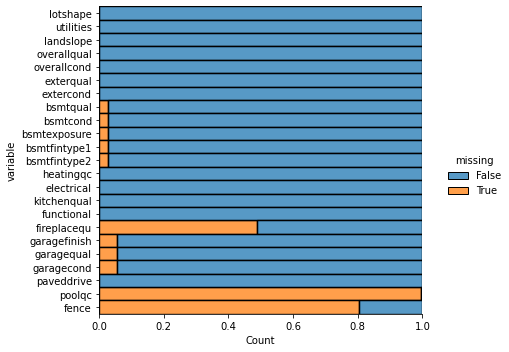

In [17]:
#quick look at nulls to see if any data needs further looking into
plt.figure(figsize=(25,25))
sns.displot(
    data=train_ord.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

array([[<AxesSubplot:title={'center':'overallqual'}>,
        <AxesSubplot:title={'center':'overallcond'}>]], dtype=object)

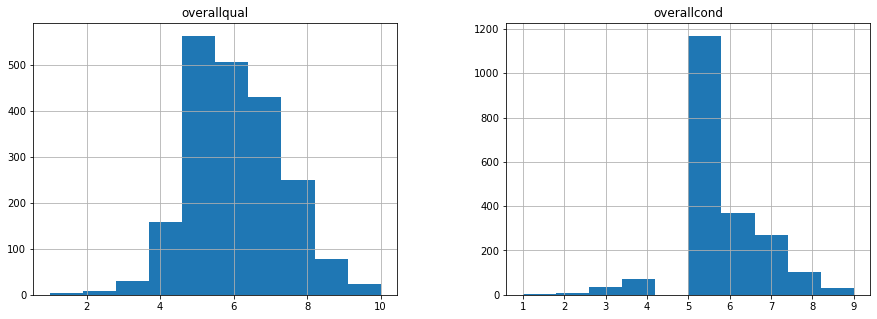

In [18]:
#quick look at distribution of data to see if anything needs further looking into
train_ord.hist(figsize=(15, 5))

In [19]:
#close look at all the unique vales
for column in train_ord:
    print(train_ord[column].value_counts(dropna=False, ascending=True))

IR3       9
IR2      55
IR1     692
Reg    1295
Name: lotshape, dtype: int64
NoSewr       1
NoSeWa       1
AllPub    2049
Name: utilities, dtype: int64
Sev      10
Mod      88
Gtl    1953
Name: landslope, dtype: int64
1       4
2       9
10     23
3      29
9      77
4     159
8     250
7     431
6     506
5     563
Name: overallqual, dtype: int64
1       4
2       6
9      29
3      35
4      70
8     101
7     270
6     368
5    1168
Name: overallcond, dtype: int64
Fa      26
Ex      81
Gd     697
TA    1247
Name: exterqual, dtype: int64
Po       2
Ex       7
Fa      49
Gd     215
TA    1778
Name: extercond, dtype: int64
Po       1
NaN     55
Fa      60
Ex     184
Gd     864
TA     887
Name: bsmtqual, dtype: int64
Ex        3
Po        5
NaN      55
Fa       65
Gd       89
TA     1834
Name: bsmtcond, dtype: int64
NaN      58
Mn      163
Gd      203
Av      288
No     1339
Name: bsmtexposure, dtype: int64
NaN     55
LwQ    102
Rec    183
BLQ    200
ALQ    293
Unf    603
GLQ    615
Nam

Some observations:
1. utilities, paveddrive, landslope, electrical, kitchenqual, garagequal, fence, poolqc, garagecond, bsmtfintype2, exterqual, bsmtcond, functional have a large number of similar values.
2. Scale seems to be split into Po, Ex, Fa, Gd, TA across for some items, with assuming that null values are due to lack of said facility, such as lack of basement for bsmtqual. Can be mapped accordingly later.

<Figure size 1800x1800 with 0 Axes>

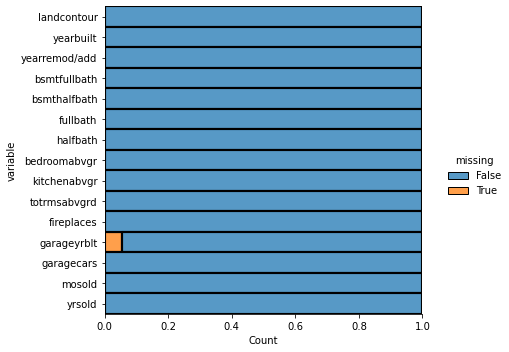

In [20]:
#quick look at nulls to see if any data needs further looking into
plt.figure(figsize=(25,25))
sns.displot(
    data=train_dis.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

array([[<AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'yearremod/add'}>,
        <AxesSubplot:title={'center':'bsmtfullbath'}>,
        <AxesSubplot:title={'center':'bsmthalfbath'}>],
       [<AxesSubplot:title={'center':'fullbath'}>,
        <AxesSubplot:title={'center':'halfbath'}>,
        <AxesSubplot:title={'center':'bedroomabvgr'}>,
        <AxesSubplot:title={'center':'kitchenabvgr'}>],
       [<AxesSubplot:title={'center':'totrmsabvgrd'}>,
        <AxesSubplot:title={'center':'fireplaces'}>,
        <AxesSubplot:title={'center':'garageyrblt'}>,
        <AxesSubplot:title={'center':'garagecars'}>],
       [<AxesSubplot:title={'center':'mosold'}>,
        <AxesSubplot:title={'center':'yrsold'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

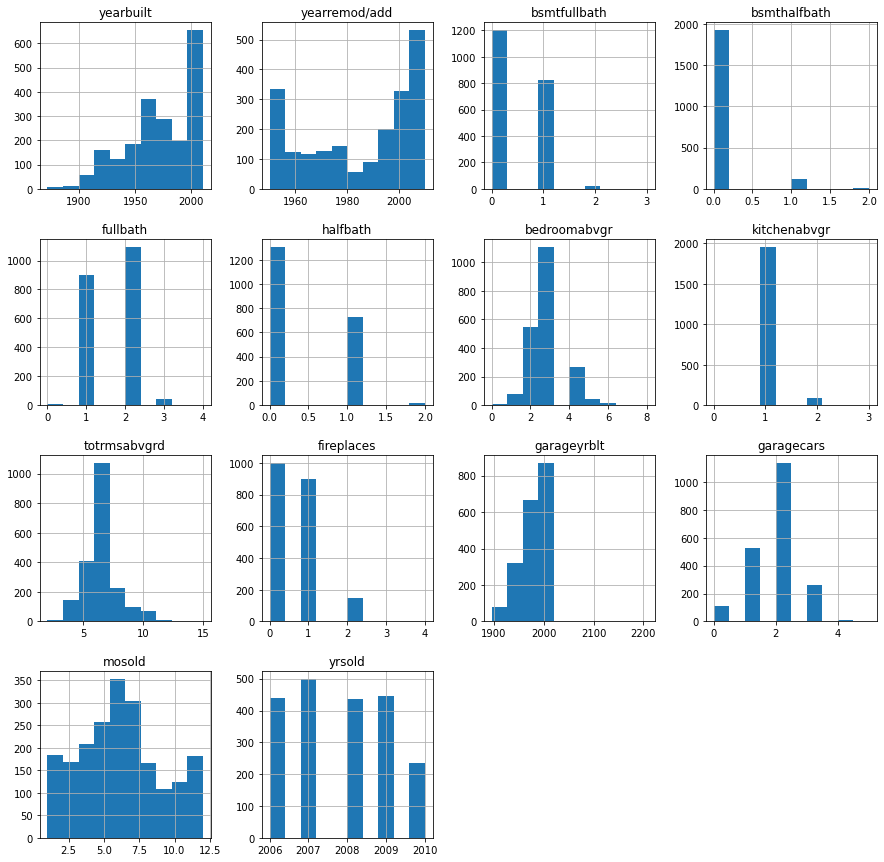

In [21]:
#quick look at distribution of data to see if anything needs further looking into
train_dis.hist(figsize=(15, 15))

In [22]:
#close look at all the unique vales
for column in train_dis:
    print(train_dis[column].value_counts(dropna=False, ascending=True))

Low      43
Bnk      80
HLS      85
Lvl    1843
Name: landcontour, dtype: int64
1872      1
1879      1
1885      1
1893      1
1911      1
1913      1
1875      1
2010      1
1896      1
1908      1
1898      1
1892      1
1901      2
1905      2
1917      2
1919      2
1932      3
1895      3
1880      3
1982      3
1912      3
1985      4
1934      4
1931      4
1918      4
1991      5
1890      5
1989      6
1981      6
1942      6
1983      6
1914      7
1938      7
1937      7
1987      7
1916      8
1928      8
1927      8
1929      8
1947      8
1921      9
1936      9
1935      9
1946      9
1986      9
1923     10
1945     11
1984     11
1949     11
1924     11
1988     11
1952     11
1926     12
1922     12
1974     13
1951     13
1973     13
2009     14
1979     15
1939     15
1969     16
1980     16
1990     16
1915     17
1941     18
1930     18
1900     20
1948     20
1953     20
1997     20
1992     21
1975     21
1925     22
1972     23
1957     23
1960     23
1955    

Some observations:
1. yearbuilt, mosold, yearremod/add, yrsold could probably be combined to determine age of house when it was sold or renovated.
2. landcontour, bsmthalfbath, kitchenabvgr has a large number of similar values.

In [23]:
#checking yearbuilt and garageyrblt correlation as column will be dropped later and collinearity is suspected between these 2 
train_dis['yearbuilt'].corr(train_dis['garageyrblt'])

0.8253163760422906

This makes sense as most people would likely want to install the garage as well when the house is built. Will drop garageyrblt as .corr skips null values for corr pairs and it doesn't make sense to fill garageyrblt with 0/mean/mode since null most likely indicates lack of the garage.

<Figure size 1800x1800 with 0 Axes>

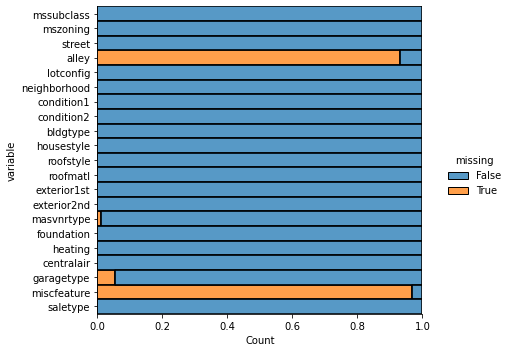

In [24]:
#quick look at nulls to see if any data needs further looking into
plt.figure(figsize=(25,25))
sns.displot(
    data=train_nom.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

array([[<AxesSubplot:title={'center':'mssubclass'}>]], dtype=object)

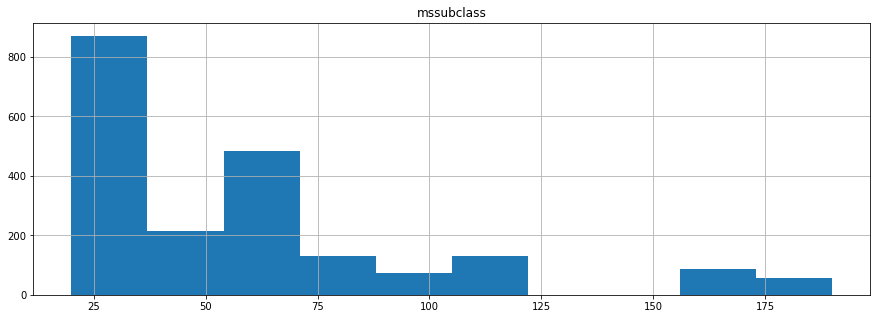

In [25]:
#quick look at distribution of data to see if anything needs further looking into
train_nom.hist(figsize=(15, 5))

In [26]:
#close look at all the unique values
for column in train_nom:
    print(train_nom[column].value_counts(dropna=False, ascending=True))

150      1
40       4
180     11
45      11
75      16
85      28
190     46
90      75
80      86
160     88
70      90
30     101
120    132
50     198
60     394
20     770
Name: mssubclass, dtype: int64
I (all)       1
A (agr)       2
RH           14
C (all)      19
FV          101
RM          316
RL         1598
Name: mszoning, dtype: int64
Grvl       7
Pave    2044
Name: street, dtype: int64
Pave      55
Grvl      85
NaN     1911
Name: alley, dtype: int64
FR3           9
FR2          60
CulDSac     131
Corner      348
Inside     1503
Name: lotconfig, dtype: int64
Landmrk      1
GrnHill      2
Greens       3
Blueste      6
Veenker     17
NPkVill     17
BrDale      19
Blmngtn     22
MeadowV     24
ClearCr     27
SWISU       32
StoneBr     38
NoRidge     48
Timber      48
IDOTRR      69
Crawfor     71
BrkSide     76
Mitchel     82
SawyerW     87
NWAmes      87
Sawyer     111
Gilbert    116
NridgHt    122
Somerst    130
Edwards    143
OldTown    163
CollgCr    180
NAmes      310
Name

Some observations:
1. street, alley, condition2, roofmatl, heating, centralair, miscfeature has a large number of similar values.
2. Null values are due to lack of said facility, such as lack of garage for garagetype and miscfeature.
3. mssubclass seems categorical rather, will probably convert these to strings instead.

In [27]:
#to check for null values as these are mostly areas and having null does not make much sense
train_con[train_con.columns[train_con.isnull().any()]].isnull().sum()

lotfrontage    330
masvnrarea      22
bsmtfinsf1       1
bsmtfinsf2       1
totalbsmtsf      1
bsmtunfsf        1
garagearea       1
dtype: int64

In [28]:
#fill columns with null values with 0, indicating that these features are probably not available
[train_con[col].fillna(0, inplace=True) for col in ['lotfrontage', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'totalbsmtsf',
                                                    'bsmtunfsf', 'garagearea']];

In [29]:
#check if null values were filled
train_con[train_con.columns[train_con.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [30]:
#quick look at how the data is distributed
train_con.describe()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,totalbsmtsf,bsmtunfsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.944417,10065.208191,98.626524,442.084837,47.935641,1057.471965,567.451487,1164.488055,329.329108,5.512921,1499.330083,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,181469.701609
std,33.137332,6742.488909,174.324690,461.195041,164.964052,449.908003,445.022846,396.446923,425.671046,51.068870,500.447829,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,79258.659352
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,43.500000,7500.000000,0.000000,0.000000,0.000000,793.000000,220.000000,879.500000,0.000000,0.000000,1129.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129825.000000
50%,63.000000,9430.000000,0.000000,368.000000,0.000000,994.000000,474.000000,1093.000000,0.000000,0.000000,1444.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,78.000000,11513.500000,159.000000,733.500000,0.000000,1318.500000,811.000000,1405.000000,692.500000,0.000000,1728.500000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,159000.000000,1600.000000,5644.000000,1474.000000,6110.000000,2336.000000,5095.000000,1862.000000,1064.000000,5642.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,611657.000000


In [31]:
#close look at correlation matrix to get some preliminary insight
train_con.corr()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,totalbsmtsf,bsmtunfsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,saleprice
lotfrontage,1.000000,0.135586,0.101672,0.056742,0.001322,0.204375,0.147324,0.230839,-0.014954,0.011487,0.171320,0.173790,0.011388,0.095295,0.009207,0.008076,0.036598,0.092288,0.026066,0.181456
lotarea,0.135586,1.000000,0.167520,0.215648,0.041799,0.277478,0.041544,0.381593,0.029398,0.001273,0.327427,0.263145,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.296566
masvnrarea,0.101672,0.167520,1.000000,0.318761,-0.015346,0.403618,0.083393,0.386482,0.098692,-0.061104,0.383875,0.380563,0.164006,0.157836,-0.105934,0.011771,0.088207,0.012789,0.079630,0.503579
bsmtfinsf1,0.056742,0.215648,0.318761,1.000000,-0.050101,0.539251,-0.472598,0.462360,-0.167591,-0.078294,0.215735,0.331252,0.214540,0.140570,-0.076766,0.047756,0.093338,0.075938,0.130054,0.423856
bsmtfinsf2,0.001322,0.041799,-0.015346,-0.050101,1.000000,0.086760,-0.231053,0.095758,-0.087380,-0.002749,0.001254,0.013610,0.105924,-0.004280,0.004594,-0.024210,0.096442,0.061033,-0.005502,0.016432
totalbsmtsf,0.204375,0.277478,0.403618,0.539251,0.086760,1.000000,0.419969,0.808351,-0.216139,-0.022295,0.454245,0.488954,0.225164,0.257666,-0.087500,0.060320,0.076286,0.061493,0.125534,0.629303
bsmtunfsf,0.147324,0.041544,0.083393,-0.472598,-0.231053,0.419969,1.000000,0.302567,-0.012439,0.059618,0.235192,0.145986,-0.033965,0.116402,-0.010608,0.020464,-0.055356,-0.039154,-0.005829,0.190861
1stflrsf,0.230839,0.381593,0.386482,0.462360,0.095758,0.808351,0.302567,1.000000,-0.268855,-0.010399,0.562441,0.498690,0.226243,0.259072,-0.044032,0.066991,0.089140,0.129995,0.139496,0.618486
2ndflrsf,-0.014954,0.029398,0.098692,-0.167591,-0.087380,-0.216139,-0.012439,-0.268855,1.000000,0.014645,0.639092,0.119695,0.109070,0.165080,0.021083,-0.033167,0.035105,0.012642,0.004413,0.248452
lowqualfinsf,0.011487,0.001273,-0.061104,-0.078294,-0.002749,-0.022295,0.059618,-0.010399,0.014645,1.000000,0.106266,-0.070991,-0.017246,-0.006253,0.089883,-0.003461,0.014218,-0.006854,-0.005756,-0.041594


Some observations:
1. wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch are all exterior attachments that have very little correlation, indicating that most houses would probably only install one of these. These features can probably be combined as an 'outdoor feature' column, with a binary yes/no for whether or not the house has one of these.
2. miscval, poolarea, lowqualfinsf, 2ndflrsf, bsmtunfsf, bsmtfinsf2, bsmtfinsf1, lotarea, lotfrontage have relatively weak or no corr with sale price and will be dropped.

# Data Cleaning

In [32]:
#to drop columns with largely similar values mentioned in the rudimentary findings

train.drop(columns=['miscval', 'poolarea', 'lowqualfinsf', '2ndflrsf', 'bsmtunfsf', 'bsmtfinsf2', 'bsmtfinsf1', 
                    'lotarea', 'lotfrontage', 'landcontour', 'bsmthalfbath', 'kitchenabvgr', 'utilities', 
                    'paveddrive', 'landslope', 'electrical', 'kitchenqual', 'garagequal', 'fence', 'poolqc', 
                    'garagecond', 'bsmtfintype2', 'exterqual', 'bsmtcond', 'functional', 'street', 'alley', 
                    'condition2', 'roofmatl', 'heating', 'centralair', 'miscfeature', 'garageyrblt'], inplace=True)
test.drop(columns=['miscval', 'poolarea', 'lowqualfinsf', '2ndflrsf', 'bsmtunfsf', 'bsmtfinsf2', 'bsmtfinsf1', 
                    'lotarea', 'lotfrontage', 'landcontour', 'bsmthalfbath', 'kitchenabvgr', 'utilities', 
                    'paveddrive', 'landslope', 'electrical', 'kitchenqual', 'garagequal', 'fence', 'poolqc', 
                    'garagecond', 'bsmtfintype2', 'exterqual', 'bsmtcond', 'functional', 'street', 'alley', 
                    'condition2', 'roofmatl', 'heating', 'centralair', 'miscfeature', 'garageyrblt'], inplace=True)

In [33]:
#check if columns were dropped
print('------------------------------ Train Columns -------------------------------------------')

for ind, column in enumerate(train.columns):
    print(ind, column)
    
print('------------------------------- Test Columns -------------------------------------------')
    
for ind, column in enumerate(test.columns):
    print(ind, column)

------------------------------ Train Columns -------------------------------------------
0 mssubclass
1 mszoning
2 lotshape
3 lotconfig
4 neighborhood
5 condition1
6 bldgtype
7 housestyle
8 overallqual
9 overallcond
10 yearbuilt
11 yearremod/add
12 roofstyle
13 exterior1st
14 exterior2nd
15 masvnrtype
16 masvnrarea
17 extercond
18 foundation
19 bsmtqual
20 bsmtexposure
21 bsmtfintype1
22 totalbsmtsf
23 heatingqc
24 1stflrsf
25 grlivarea
26 bsmtfullbath
27 fullbath
28 halfbath
29 bedroomabvgr
30 totrmsabvgrd
31 fireplaces
32 fireplacequ
33 garagetype
34 garagefinish
35 garagecars
36 garagearea
37 wooddecksf
38 openporchsf
39 enclosedporch
40 3ssnporch
41 screenporch
42 mosold
43 yrsold
44 saletype
45 saleprice
------------------------------- Test Columns -------------------------------------------
0 mssubclass
1 mszoning
2 lotshape
3 lotconfig
4 neighborhood
5 condition1
6 bldgtype
7 housestyle
8 overallqual
9 overallcond
10 yearbuilt
11 yearremod/add
12 roofstyle
13 exterior1st
14 exte

In [34]:
#check for null values 
train[train.columns[train.isnull().any()]].isnull().sum()

masvnrtype        22
masvnrarea        22
bsmtqual          55
bsmtexposure      58
bsmtfintype1      55
totalbsmtsf        1
bsmtfullbath       2
fireplacequ     1000
garagetype       113
garagefinish     114
garagecars         1
garagearea         1
dtype: int64

In [35]:
#check for null values
test[test.columns[test.isnull().any()]].isnull().sum()

masvnrtype        1
masvnrarea        1
bsmtqual         25
bsmtexposure     25
bsmtfintype1     25
fireplacequ     422
garagetype       44
garagefinish     45
dtype: int64

In [36]:
#remove null values by replacing them with 0 as the data only contains columns which indicate whether features exist or area
[train[col].fillna(0, inplace=True) for col in ['masvnrtype', 'masvnrarea', 'bsmtqual', 'bsmtexposure', 'bsmtfintype1', 
                                                    'totalbsmtsf', 'bsmtfullbath', 'fireplacequ', 'garagetype', 
                                                'garagefinish', 'garagecars', 'garagearea']]
[test[col].fillna(0, inplace=True) for col in ['masvnrtype', 'masvnrarea', 'bsmtqual', 'bsmtexposure', 'bsmtfintype1', 
                                               'fireplacequ', 'garagetype', 'garagefinish']]

[None, None, None, None, None, None, None, None]

In [37]:
#check if null values still exist
train[train.columns[train.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [38]:
#check if null values still exist
test[train.columns[train.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [39]:
#to change mssubclass to strings
train['mssubclass'] = train['mssubclass'].astype(str)

In [40]:
#check if change was successful
train['mssubclass'].dtypes

dtype('O')

# Feature Engineering

In [41]:
#to add 'houseage' and 'renoage' columns as mentioned above
train['houseage'] = train['yrsold'] +  (train['mosold']/12) - train['yearbuilt']
test['houseage'] = test['yrsold'] +  (test['mosold']/12) - test['yearbuilt']

train['renoage'] = train['yrsold'] +  (train['mosold']/12)  - train['yearremod/add']
test['renoage'] = test['yrsold'] +  (test['mosold']/12)  - test['yearremod/add']

In [42]:
#quick check to see if the data makes sense
print('Train House Age', '\n', train['houseage'].describe(), '\n')
print('Test House Age', '\n', test['houseage'].describe(), '\n')
print('Train Renovation Age', '\n', train['renoage'].describe(), '\n')
print('Test Renovation Age', '\n', test['renoage'].describe())

Train House Age 
 count    2051.000000
mean       36.585121
std        30.212080
min        -0.166667
25%         7.500000
50%        34.250000
75%        54.916667
max       137.000000
Name: houseage, dtype: float64 

Test House Age 
 count    878.000000
mean      37.850607
std       30.454152
min        0.250000
25%        9.062500
50%       36.458333
75%       55.041667
max      129.416667
Name: houseage, dtype: float64 

Train Renovation Age 
 count    2051.000000
mean       24.103892
std        21.017569
min        -1.166667
25%         4.750000
50%        15.583333
75%        43.875000
max        60.583333
Name: renoage, dtype: float64 

Test Renovation Age 
 count    878.000000
mean      23.924639
std       20.473113
min        0.083333
25%        5.500000
50%       15.625000
75%       41.416667
max       60.500000
Name: renoage, dtype: float64


As having a negative value is impossible for house and renovation age, the data will have to be relooked at to see why it returns a negative value.

In [43]:
#check row where house age < 0
train.loc[train['houseage']<0]

,mssubclass,mszoning,lotshape,lotconfig,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,exterior1st,exterior2nd,masvnrtype,masvnrarea,extercond,foundation,bsmtqual,bsmtexposure,bsmtfintype1,totalbsmtsf,heatingqc,1stflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,totrmsabvgrd,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,mosold,yrsold,saletype,saleprice,houseage,renoage
1885,20,RL,IR1,Inside,Edwards,Norm,1Fam,1Story,10,5,2008,2009,Hip,CemntBd,CmentBd,Stone,1224.0,TA,PConc,Ex,Gd,GLQ,5095.0,Ex,5095,5095,1.0,2,1,2,15,2,Gd,Attchd,Fin,3.0,1154.0,546,484,0,0,0,10,2007,New,183850,-0.166667,-1.166667


In [44]:
#check row where renovation age < 0
train.loc[train['renoage']<0]

,mssubclass,mszoning,lotshape,lotconfig,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,exterior1st,exterior2nd,masvnrtype,masvnrarea,extercond,foundation,bsmtqual,bsmtexposure,bsmtfintype1,totalbsmtsf,heatingqc,1stflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,totrmsabvgrd,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,mosold,yrsold,saletype,saleprice,houseage,renoage
1719,60,RL,IR1,Corner,NridgHt,Norm,1Fam,2Story,8,5,2007,2008,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,1582.0,Ex,1582,2152,0.0,2,1,3,7,1,Gd,Detchd,Unf,2.0,728.0,0,368,0,0,0,6,2007,New,260116,0.500000,-0.500000
1885,20,RL,IR1,Inside,Edwards,Norm,1Fam,1Story,10,5,2008,2009,Hip,CemntBd,CmentBd,Stone,1224.0,TA,PConc,Ex,Gd,GLQ,5095.0,Ex,5095,5095,1.0,2,1,2,15,2,Gd,Attchd,Fin,3.0,1154.0,546,484,0,0,0,10,2007,New,183850,-0.166667,-1.166667


As both entries are new sales, there's a possibility that the new owners constructed a new house or renovated the place.
As such, both values will be changed to 0 to reduce any logic errors.

In [45]:
#to set both reno and house age to 0
train.loc[train['renoage']<0] = 0
train.loc[train['houseage']<0] = 0

#quick check to see if the error was fixed
print('Train House Age', '\n', train['houseage'].describe(), '\n')
print('Train Renovation Age', '\n', train['renoage'].describe())

Train House Age 
 count    2051.000000
mean       36.584959
std        30.212275
min         0.000000
25%         7.500000
50%        34.250000
75%        54.916667
max       137.000000
Name: houseage, dtype: float64 

Train Renovation Age 
 count    2051.000000
mean       24.104705
std        21.016618
min         0.000000
25%         4.750000
50%        15.583333
75%        43.875000
max        60.583333
Name: renoage, dtype: float64


In [46]:
#to drop columns mentioned above
train.drop(columns = ['yearbuilt','mosold','yrsold','yearremod/add'],inplace=True)
test.drop(columns = ['yearbuilt','mosold','yrsold','yearremod/add'],inplace=True)

In [47]:
#to add 'outdoorfeature' column as mentioned above
train.loc[(train['wooddecksf'] + train['openporchsf'] + train['enclosedporch'] + train['3ssnporch'] + train['screenporch'])  > 0, 'outdoorfeature'] = 1
train.loc[(train['wooddecksf'] + train['openporchsf'] + train['enclosedporch'] + train['3ssnporch'] + train['screenporch']) == 0, 'outdoorfeature'] = 0

test.loc[(test['wooddecksf'] + test['openporchsf'] + test['enclosedporch'] + test['3ssnporch'] + test['screenporch'])  > 0, 'outdoorfeature'] = 1
test.loc[(test['wooddecksf'] + test['openporchsf'] + test['enclosedporch'] + test['3ssnporch'] + test['screenporch']) == 0, 'outdoorfeature'] = 0

In [48]:
#quick check if it worked
train['outdoorfeature'].value_counts(dropna=False, ascending=True)

0.0     346
1.0    1705
Name: outdoorfeature, dtype: int64

In [49]:
#to drop columns mentioned above
train.drop(columns = ['wooddecksf','openporchsf','enclosedporch','3ssnporch', 'screenporch'],inplace=True)
test.drop(columns = ['wooddecksf','openporchsf','enclosedporch','3ssnporch', 'screenporch'],inplace=True)

In [50]:
#check if columns were dropped
print('------------------------------ Train Columns -------------------------------------------')

for ind, column in enumerate(train.columns):
    print(ind, column)
    
print('------------------------------- Test Columns -------------------------------------------')
    
for ind, column in enumerate(test.columns):
    print(ind, column)

------------------------------ Train Columns -------------------------------------------
0 mssubclass
1 mszoning
2 lotshape
3 lotconfig
4 neighborhood
5 condition1
6 bldgtype
7 housestyle
8 overallqual
9 overallcond
10 roofstyle
11 exterior1st
12 exterior2nd
13 masvnrtype
14 masvnrarea
15 extercond
16 foundation
17 bsmtqual
18 bsmtexposure
19 bsmtfintype1
20 totalbsmtsf
21 heatingqc
22 1stflrsf
23 grlivarea
24 bsmtfullbath
25 fullbath
26 halfbath
27 bedroomabvgr
28 totrmsabvgrd
29 fireplaces
30 fireplacequ
31 garagetype
32 garagefinish
33 garagecars
34 garagearea
35 saletype
36 saleprice
37 houseage
38 renoage
39 outdoorfeature
------------------------------- Test Columns -------------------------------------------
0 mssubclass
1 mszoning
2 lotshape
3 lotconfig
4 neighborhood
5 condition1
6 bldgtype
7 housestyle
8 overallqual
9 overallcond
10 roofstyle
11 exterior1st
12 exterior2nd
13 masvnrtype
14 masvnrarea
15 extercond
16 foundation
17 bsmtqual
18 bsmtexposure
19 bsmtfintype1
20 tot

In [51]:
#Ordinal mapping, columns with similar standardised order
ordinal_map = ['extercond', 'bsmtqual', 'heatingqc', 'fireplacequ']

#map keys
ordinal_dict_1 = {'Po':1,'Fa':2,"TA":3,"Gd":4,'Ex':5}

In [52]:
#creating a function to replace the ordinal scales with numberical 1-5
def mapping_ordinal(df,col):
    df[col] = df[col].replace(ordinal_dict_1)
    print(df[col].value_counts())
    print('\n')
    return df.head()

In [53]:
#applying function and checking if mapping was successful
mapping_ordinal(train, 'extercond')
mapping_ordinal(train, 'bsmtqual')
mapping_ordinal(train, 'heatingqc')
mapping_ordinal(train, 'fireplacequ')

mapping_ordinal(test, 'extercond')
mapping_ordinal(test, 'bsmtqual')
mapping_ordinal(test, 'heatingqc')
mapping_ordinal(test, 'fireplacequ')

3    1776
4     215
2      49
5       7
0       2
1       2
Name: extercond, dtype: int64


3    887
4    863
5    183
2     60
0     57
1      1
Name: bsmtqual, dtype: int64


5    1063
3     597
4     319
2      67
1       3
0       2
Name: heatingqc, dtype: int64


0    1002
4     521
3     407
2      59
1      31
5      31
Name: fireplacequ, dtype: int64


3    770
4     84
2     18
5      5
1      1
Name: extercond, dtype: int64


3    396
4    355
5     73
2     28
0     25
1      1
Name: bsmtqual, dtype: int64


5    429
3    267
4    157
2     25
Name: heatingqc, dtype: int64


0    422
4    220
3    193
2     16
1     15
5     12
Name: fireplacequ, dtype: int64




,mssubclass,mszoning,lotshape,lotconfig,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,roofstyle,exterior1st,exterior2nd,masvnrtype,masvnrarea,extercond,foundation,bsmtqual,bsmtexposure,bsmtfintype1,totalbsmtsf,heatingqc,1stflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,totrmsabvgrd,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,saletype,houseage,renoage,outdoorfeature
0,190,RM,Reg,Inside,OldTown,Norm,2fmCon,2Story,6,8,Gable,AsbShng,AsbShng,None,0.0,2,Stone,2,No,Unf,1020,4,908,1928,0,2,0,4,9,0,0,Detchd,Unf,1,440,WD,96.333333,56.333333,1.0
1,90,RL,IR1,Inside,Sawyer,Norm,Duplex,1Story,5,4,Gable,Plywood,Plywood,None,0.0,3,CBlock,4,No,Unf,1967,3,1967,1967,0,2,0,6,10,0,0,Attchd,Fin,2,580,WD,29.666667,29.666667,1.0
2,60,RL,IR1,Inside,Gilbert,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,None,0.0,3,PConc,4,Av,GLQ,654,5,664,1496,1,2,1,3,7,1,4,Attchd,RFn,2,426,New,0.750000,0.750000,1.0
3,30,RM,Reg,Inside,OldTown,Norm,1Fam,1Story,5,6,Gable,Wd Sdng,Wd Sdng,None,0.0,3,CBlock,3,No,Unf,968,3,968,968,0,1,0,2,5,0,0,Detchd,Unf,2,480,WD,84.583333,1.583333,1.0
4,20,RL,IR1,Inside,NAmes,Norm,1Fam,1Story,6,5,Gable,Plywood,Plywood,BrkFace,247.0,3,CBlock,4,No,BLQ,1394,4,1394,1394,1,1,1,3,6,2,4,Attchd,RFn,2,514,WD,46.583333,46.583333,1.0


In [54]:
#Ordinal mapping, columns with unique order
ordinal_map_2 = ['bsmtexposure', 'bsmtfintype1', 'garagefinish']

#map keys
bsmt_dict = {"Gd":4,"Av":3,"Mn":2,"No":1}
bsmtfin_dict = {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1}
garagefin_dict = {"Fin":3,"RFn":2,"Unf":1}

train['bsmtexposure'] = train['bsmtexposure'].replace(bsmt_dict) 
test['bsmtexposure'] = test['bsmtexposure'].replace(bsmt_dict) 

train['bsmtfintype1'] = train['bsmtfintype1'].replace(bsmtfin_dict) 
test['bsmtfintype1'] = test['bsmtfintype1'].replace(bsmtfin_dict)

train['garagefinish'] = train['garagefinish'].replace(garagefin_dict) 
test['garagefinish'] = test['garagefinish'].replace(garagefin_dict)

#checking if mapping was successful
print(train['bsmtexposure'].value_counts())
print(train['bsmtfintype1'].value_counts())
print(train['garagefinish'].value_counts())
train.head()

1    1338
3     288
4     202
2     163
0      60
Name: bsmtexposure, dtype: int64
6    614
1    602
5    293
4    200
3    183
2    102
0     57
Name: bsmtfintype1, dtype: int64
1    848
2    579
3    508
0    116
Name: garagefinish, dtype: int64


,mssubclass,mszoning,lotshape,lotconfig,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,roofstyle,exterior1st,exterior2nd,masvnrtype,masvnrarea,extercond,foundation,bsmtqual,bsmtexposure,bsmtfintype1,totalbsmtsf,heatingqc,1stflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,totrmsabvgrd,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,saletype,saleprice,houseage,renoage,outdoorfeature
0,60,RL,IR1,CulDSac,Sawyer,RRAe,1Fam,2Story,6,8,Gable,HdBoard,Plywood,BrkFace,289.0,3,CBlock,3,1,6,725.0,5,725,1479,0.0,2,1,3,6,0,0,Attchd,2,2.0,475.0,WD,130500,34.250000,5.250000,1.0
1,60,RL,IR1,CulDSac,SawyerW,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,132.0,3,PConc,4,1,6,913.0,5,913,2122,1.0,2,1,4,8,1,3,Attchd,2,2.0,559.0,WD,220000,13.333333,12.333333,1.0
2,20,RL,Reg,Inside,NAmes,Norm,1Fam,1Story,5,7,Gable,VinylSd,VinylSd,None,0.0,4,CBlock,3,1,6,1057.0,3,1057,1057,1.0,1,0,3,5,0,0,Detchd,1,1.0,246.0,WD,109000,57.083333,3.083333,1.0
3,60,RL,Reg,Inside,Timber,Norm,1Fam,2Story,5,5,Gable,VinylSd,VinylSd,None,0.0,3,PConc,4,1,1,384.0,4,744,1444,0.0,2,1,3,7,0,0,BuiltIn,3,2.0,400.0,WD,174000,4.333333,3.333333,1.0
4,50,RL,IR1,Inside,SawyerW,Norm,1Fam,1.5Fin,6,8,Gable,Wd Sdng,Plywood,None,0.0,3,PConc,2,1,1,676.0,3,831,1445,0.0,2,0,3,6,0,0,Detchd,1,2.0,484.0,WD,138500,110.250000,17.250000,1.0


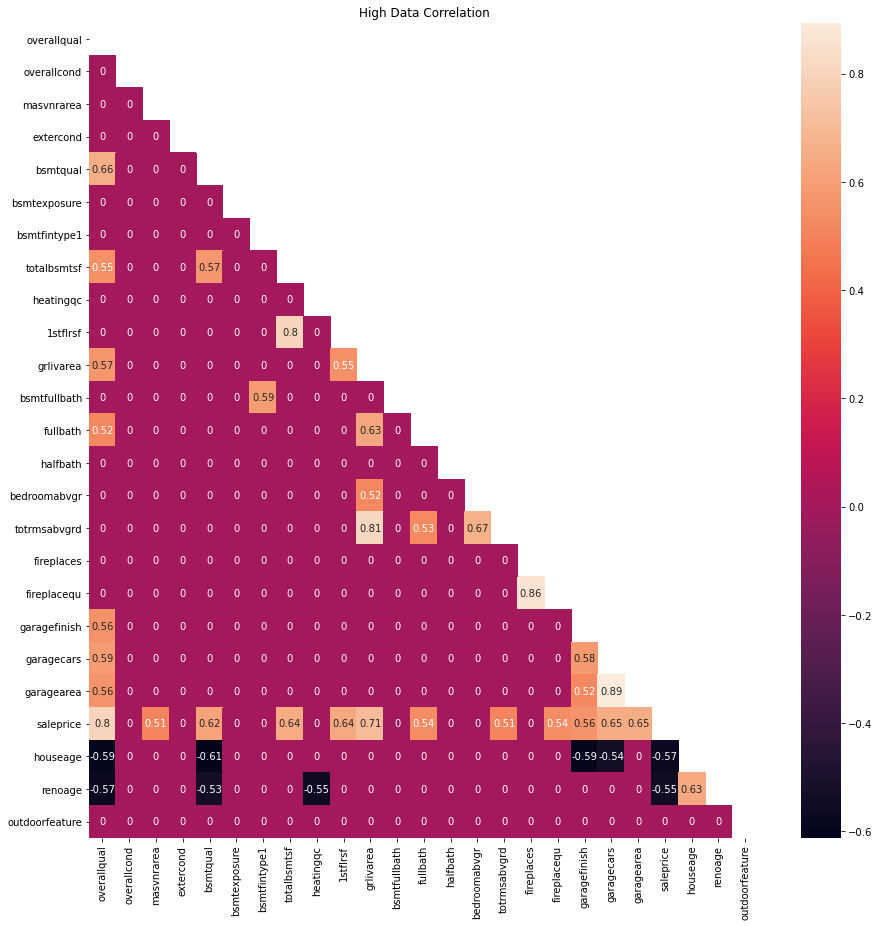

In [55]:
#quick visual look at factors with high correlation
correlations = train.corr()
correlations[(np.abs(correlations)<.5) ] = 0
plt.figure(figsize=(15,15))

custom_mask = np.zeros_like(correlations.corr())   
custom_mask[np.triu_indices_from(custom_mask)] = True  

sns.heatmap(correlations,annot=True,mask=custom_mask).set_title("High Data Correlation");

In [56]:
#consolidation of factors with high correlation
high_corrs = correlations[correlations.abs() > 0.5][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attribute_1', 'Attribute_2','Correlations']
high_corrs['Correlations'] = high_corrs['Correlations'].drop_duplicates(keep ='first')
high_corrs = high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)
high_corrs

,Attribute_1,Attribute_2,Correlations
52,garagecars,garagearea,0.894377
42,fireplaces,fireplacequ,0.859886
29,grlivarea,totrmsabvgrd,0.812210
7,overallqual,saleprice,0.801862
19,totalbsmtsf,1stflrsf,0.800967
30,grlivarea,saleprice,0.707503
37,bedroomabvgr,totrmsabvgrd,0.667694
0,overallqual,bsmtqual,0.658912
58,garagearea,saleprice,0.652932
53,garagecars,saleprice,0.650002


Possible multicollinearity issues:
1. garagecars	garagearea  	0.893442

   Number of cars a garage can hold and area having high corr makes sense as you'd need more space for to hold more cars. Using    area of garage is more logical than number of cars it can fit.
   
   
2. fireplaces	fireplacequ  	0.859734

   fireplaces and quality of the fireplaces having high corr makes sense especially since quality was mapped to a numerical 
   scale. Will drop quality as many houses do not even have a fireplace and the quality is concentrate at on 3-4 on the scale.
   
   
3. grlivarea	totrmsabvgrd	0.813333

   Living area above grade and total rooms above grade have high correlation, but as these are separate features, neither will
   be dropped.
   
   
4. totalbsmtsf	1stflrsf	    0.808351

   Similarly, basement area and 1st floor area are separate features and both are retained.
   

In [57]:
#dropping columns based on justification above
train.drop(columns = ['garagecars','fireplacequ'],inplace=True)
test.drop(columns = ['garagecars','fireplacequ'],inplace=True)

In [58]:
#check if columns were dropped
print('------------------------------ Train Columns -------------------------------------------')

for ind, column in enumerate(train.columns):
    print(ind, column)
    
print('------------------------------- Test Columns -------------------------------------------')
    
for ind, column in enumerate(test.columns):
    print(ind, column)

------------------------------ Train Columns -------------------------------------------
0 mssubclass
1 mszoning
2 lotshape
3 lotconfig
4 neighborhood
5 condition1
6 bldgtype
7 housestyle
8 overallqual
9 overallcond
10 roofstyle
11 exterior1st
12 exterior2nd
13 masvnrtype
14 masvnrarea
15 extercond
16 foundation
17 bsmtqual
18 bsmtexposure
19 bsmtfintype1
20 totalbsmtsf
21 heatingqc
22 1stflrsf
23 grlivarea
24 bsmtfullbath
25 fullbath
26 halfbath
27 bedroomabvgr
28 totrmsabvgrd
29 fireplaces
30 garagetype
31 garagefinish
32 garagearea
33 saletype
34 saleprice
35 houseage
36 renoage
37 outdoorfeature
------------------------------- Test Columns -------------------------------------------
0 mssubclass
1 mszoning
2 lotshape
3 lotconfig
4 neighborhood
5 condition1
6 bldgtype
7 housestyle
8 overallqual
9 overallcond
10 roofstyle
11 exterior1st
12 exterior2nd
13 masvnrtype
14 masvnrarea
15 extercond
16 foundation
17 bsmtqual
18 bsmtexposure
19 bsmtfintype1
20 totalbsmtsf
21 heatingqc
22 1stf

In [59]:
#saving and exporting cleaned data
train_cleaned = train
test_cleaned = test

train.to_csv('train_cleaned')
test.to_csv('test_cleaned')

In [60]:
#dummifying categorical data
train_dummy = pd.get_dummies(train_cleaned, drop_first = True)
test_dummy = pd.get_dummies(test_cleaned, drop_first = True)

#check for dummified shape
print(train_dummy.shape)
print(test_dummy.shape)

(2051, 166)
(878, 136)


In [61]:
#setting model parameters
X = train_dummy.loc[:, train_dummy.columns != 'saleprice']
y = train_dummy[['saleprice']]

In [62]:
#train test split
np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

#quick look at data 
print('Training Data Shape:')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Testing Data Shape:')
print(X_test.shape)
print(y_test.shape)

Training Data Shape:
(1435, 165)
(1435, 1)


Testing Data Shape:
(616, 165)
(616, 1)


In [63]:
# Scaling Data:
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

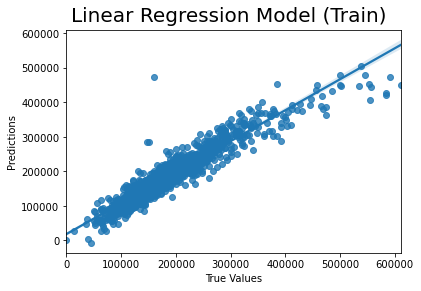

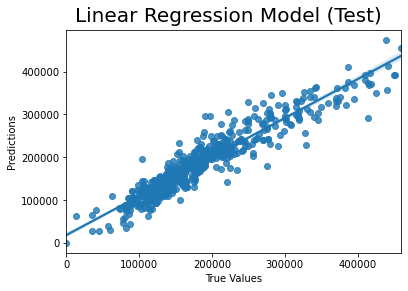



Train R-squared score (LR) : 0.885
Test R-squared score (LR): 0.8817


Train Cross Val Score (LR): 0.8334
Test Cross Val Score (LR): 0.8823


In [64]:
#Linear Regression model cell
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

#LR train scatter plot
sns.regplot(y_train, lr_pred_train)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Linear Regression Model (Train)", size=20)
plt.subplots_adjust(top=.9)
plt.show()

#LR test scatter plot
sns.regplot(y_test, lr_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Linear Regression Model (Test)", size=20)
plt.subplots_adjust(top=.9)
plt.show()
print('\n')

# Calculate model performance
#r2 score
R_squared_train = r2_score(lr_pred_train, y_train)
R_squared_test = r2_score(lr_pred_test, y_test)
print('Train R-squared score (LR) : '+ str((round((R_squared_train),4))))
print('Test R-squared score (LR): ' + str((round((R_squared_test),4))))

#cross val scores
lr_train_scores = cross_val_score(lr, X_train, y_train, cv=10)
lr_test_scores = cross_val_score(lr, X_test, y_test, cv=10)
print('\n')
print("Train Cross Val Score (LR): " + str(round(lr_train_scores.mean(),4)))
print("Test Cross Val Score (LR): " + str(round(lr_test_scores.mean(),4)))

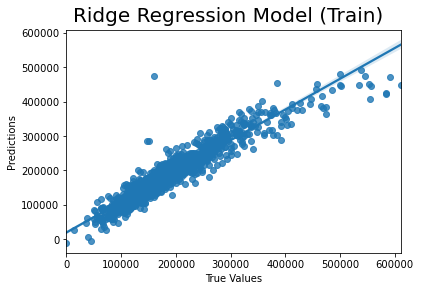

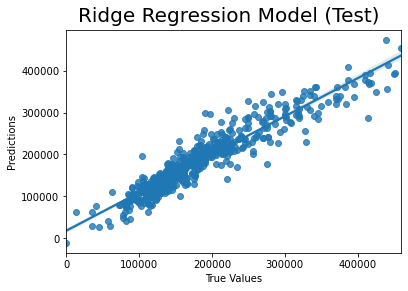



Train R-squared score (Ridge) : 0.8967
Test R-squared score (Ridge) : 0.8897


Cross Val Score (Ridge) : 0.8376
Cross Val Score (Ridge) : 0.8887


In [65]:
#Ridge model cell
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge.fit(X_train_scaled,y_train)
y_pred_test_ridge = ridge.predict(X_test_scaled)
y_pred_train_ridge = ridge.predict(X_train_scaled)

#ridge train scatter plot
sns.regplot(y_train, y_pred_train_ridge)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Ridge Regression Model (Train)", size=20)
plt.subplots_adjust(top=.9)
plt.show()

#ridge test scatter plot
sns.regplot(y_test, y_pred_test_ridge)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Ridge Regression Model (Test)", size=20)
plt.subplots_adjust(top=.9)
plt.show()
print('\n')

# Calculate model performance
#r2 score
ridge_R2_train = round(ridge.score(X_train_scaled,y_train),4)
ridge_R2_test = round(ridge.score(X_test_scaled,y_test),4)
print('Train R-squared score (Ridge) : '+ str((round((ridge_R2_train),4))))
print('Test R-squared score (Ridge) : ' + str((round((ridge_R2_test),4))))

#cross val scores
ridge_train_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=10)
ridge_test_scores = cross_val_score(ridge, X_test_scaled, y_test, cv=10)
print('\n')
print("Cross Val Score (Ridge) : " + str(round(ridge_train_scores.mean(),4)))
print("Cross Val Score (Ridge) : " + str(round(ridge_test_scores.mean(),4)))

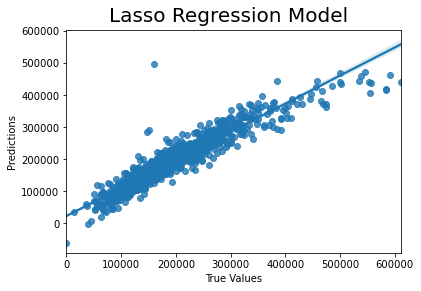

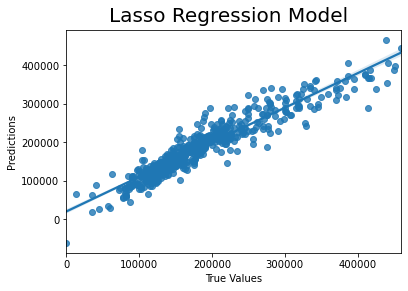

Train R-squared score (Lasso) : 0.8911
Test R-squared score (Lasso) : 0.8931


Cross Val Score (Lasso) : 0.8438
Cross Val Score (Lasso) : 0.8962


In [66]:
#Lasso model cell
lasso = LassoCV(n_alphas=200)
lasso.fit(X_train_scaled,y_train)
y_pred_test_lasso = lasso.predict(X_test_scaled)
y_pred_train_lasso = lasso.predict(X_train_scaled)

#ridge train scatter plot
sns.regplot(y_train, y_pred_train_lasso)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Lasso Regression Model", size=20)
plt.subplots_adjust(top=.9)
plt.show()

#ridge test scatter plot
sns.regplot(y_test, y_pred_test_lasso)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.suptitle("Lasso Regression Model", size=20)
plt.subplots_adjust(top=.9)
plt.show()

#Calculate model performance
#r2 scores
lasso_R2_train = round(lasso.score(X_train_scaled,y_train),4)
lasso_R2_test = round(lasso.score(X_test_scaled,y_test),4)
print('Train R-squared score (Lasso) : '+ str((round((lasso_R2_train),4))))
print('Test R-squared score (Lasso) : ' + str((round((lasso_R2_test),4))))

#cross val scores
lasso_train_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=10)
lasso_test_scores = cross_val_score(lasso, X_test_scaled, y_test, cv=10)
print('\n')
print("Cross Val Score (Lasso) : " + str(round(lasso_train_scores.mean(),4)))
print("Cross Val Score (Lasso) : " + str(round(lasso_test_scores.mean(),4)))

As the Lasso model has the best test R-squared score and Cross Val Score, it is thus selected for further analysis into which coefficients mattered the most for sale price.

Text(0.5, 1.0, 'Residuals')

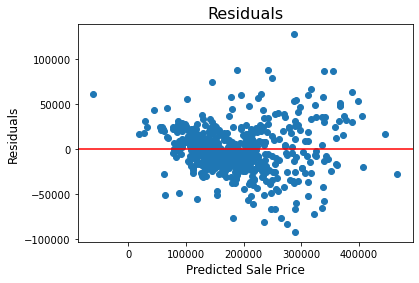

In [67]:
#plot residuals for lasso
lasso_predict = lasso.predict(X_test_scaled)
lasso_predict = lasso_predict.reshape(616,1)
residuals = y_test - lasso_predict
plt.scatter(y_pred_test_lasso, residuals)
plt.axhline(y=0, c='red')
plt.xlabel('Predicted Sale Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals', fontsize=16)

Residuals plotted looked fairly concentrated about 0, indicating that the model is a decent fit for the test results.

In [68]:
#to check which coefficients were the best predictors of sale price
lasso_coef_series = pd.Series(lasso.coef_,index=X.columns)
lasso_coef_df = pd.Series.to_frame(lasso_coef_series)
lasso_coef_df.rename(columns={0:'coefficient'},inplace=True)
lasso_coef_df=lasso_coef_df.sort_values(by='coefficient',ascending=False)
lasso_coef_df_neg=lasso_coef_df.sort_values(by='coefficient',ascending=True)
print(lasso_coef_df.head(10))
print('\n')
print(lasso_coef_df_neg.head(10))

                       coefficient
grlivarea             19821.233293
overallqual           16809.792916
neighborhood_NridgHt  10372.292260
neighborhood_StoneBr   9137.530379
bsmtexposure           6903.691671
masvnrarea             6784.514890
garagearea             6011.350513
bldgtype_1Fam          5873.824820
neighborhood_NoRidge   4948.166563
bsmtfullbath           4528.756908


                      coefficient
houseage             -6157.597470
lotshape_IR3         -3941.979965
renoage              -2791.608479
masvnrtype_BrkFace   -2574.715482
bldgtype_TwnhsE      -2092.382642
bedroomabvgr         -1863.639665
neighborhood_Edwards -1804.332336
bldgtype_Twnhs       -1799.728615
roofstyle_Mansard    -1790.105137
masvnrtype_BrkCmn    -1560.227907


Individual factors that most affected housing prices were:
1. Living Area Above Grade
2. Overall Quality
3. Neighbourhood - Northridge Height
4. Neighbourhood - Stone Brook
5. Basement Exposesure

However, when looked at the higher ranking features, some of them can be collectively summed into different general features: Garage Area, Living Area, Basement full bath are all size related, and hence when considering Living Area above grade, some of these features could be considered as well, when trying to implement any increase in living area if the purpose is to maximise sale price. 

# Conclusions and Recommendations

Factors that most affected selling price:

1. Living Area

   Size of the ground living area scored the highest by far. Houses that had the biggest livable ground floor tend to sell for better prices, and certain features related to size like number of rooms, fireplaces and bathrooms also had an impact. Size of the garage and masonry area has a high positive correlation to sale prices as well. 
   

2. Overall Quality 

   Scoring only very slightly behind the size of the ground living area, overall quality encompasses the materials and finish of the house. In short, do not skimp on materials used during construction of the house. 
   

3. Neighbourhood

   Some neighbourhoods such as Northridge Heights, Northridge and Stone Brook had very high positive correlation with sale    price, whilst others like Edwards, Northwest Ames and Old Town had high negative correlation with sale price. Hence, looking at where houses are located can be quite a big factor even if you consider all other aspects of the house.
   

4. House Age
	
   Older houses sell for less. 
   
	
5. Building Type

   Townhouses, both end and inside units had the strongest negative correlation (of all factors) with sale price, while other building types leave the sale prices relatively unscathed. 


Recommendations:

Overall, homeowners looking to maximise their sale prices should look at possibly expanding the living area of the house. This makes houses with big lots but smaller living areas more attractive to those that are considering flipping the house some time later, as lot area did not affect sale prices as much. 

For homeowners looking to let go of older houses, a remodeling of the house to boost overall quality will prove useful in driving prices up as well. Lastly, the neighbourhood and building type of the house matters quite a fair bit as well. 

Owners looking to let go of houses need to anchor their expectations with the location and house type in mind as well as these are independent factors that cannot be changed.